In [ ]:
import numpy as np
import pandas as pd
import string as st
import re
import nltk
from nltk import PorterStemmer, WordNetLemmatizer
import nltk.corpus
import os
nltk.download('all')

In [ ]:
df = open("/content/sample_data/SMSSpamCollection")
list1, list2 = zip(*[x.split('\t') for x in df.readlines()])
data = {'label':list1, 'data':list2}
df = pd.DataFrame(data)
df.head()

,label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...\n
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X = df['data']
y = df['label']
data = list(X)

### Pre-Processing


In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

df['data_preprocessed']=df['data'].map(lambda s:preprocess(s))

In [ ]:
df.head()

,label,data,data_preprocessed
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...\n,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts may te...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [ ]:
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm, preprocessing
label_encoder = preprocessing.LabelEncoder()

df['label']= label_encoder.fit_transform(df['label'])

In [ ]:
df.head()

,label,data,data_preprocessed
0,0,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,0,Ok lar... Joking wif u oni...\n,lar joking wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts may te...
3,0,U dun say so early hor... U c already then say...,dun say early hor already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


##Exercise 1: Naive Bayes on Pre-processed Data

In [ ]:
X = df['data_preprocessed']
y = df['label']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.70, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

X_train_counts = count_vector.fit_transform(X_train)

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
X_new_counts = count_vector.transform(X_test)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
confusion_matrix

array([[3382,    0],
       [ 174,  346]])

In [ ]:
pp_acc = metrics.accuracy_score(y_test,predicted)
pp_prec = metrics.precision_score(y_test,predicted)
pp_rec = metrics.recall_score(y_test,predicted)
print('Accuracy: ' ,pp_acc)
print('Precision: ' ,pp_prec)
print('Recall: ' ,pp_rec)

Accuracy:  0.955407483341876
Precision:  1.0
Recall:  0.6653846153846154


##Exercise 2: Naive Bayes on Unprocessed Data

In [ ]:
X = df['data']
y = df['label']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.70, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

X_train_counts = count_vector.fit_transform(X_train)

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
X_new_counts = count_vector.transform(X_test)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
confusion_matrix

array([[3382,    0],
       [ 233,  287]])

In [ ]:
np_acc = metrics.accuracy_score(y_test,predicted)
np_prec = metrics.precision_score(y_test,predicted)
np_rec = metrics.recall_score(y_test,predicted)
print('Accuracy: ' ,np_acc)
print('Precision: ' ,np_prec)
print('Recall: ' ,np_rec)

Accuracy:  0.9402870322911328
Precision:  1.0
Recall:  0.551923076923077


##Exercise 3: Comparision between the performance of Naive Bayes on unprocessed and preprocessed data

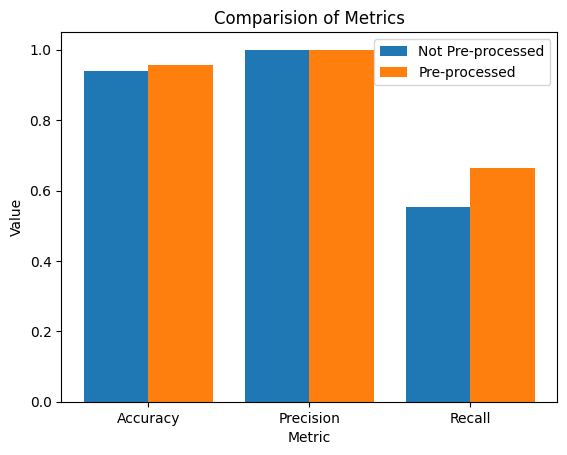

In [ ]:
import matplotlib.pyplot as plt
met = ['Accuracy','Precision','Recall']
not_pro = [np_acc,np_prec,np_rec]
pro = [pp_acc,pp_prec,pp_rec]

X_axis = np.arange(3)

plt.bar(X_axis - 0.2, not_pro, 0.4, label = 'Not Pre-processed')
plt.bar(X_axis + 0.2, pro, 0.4, label = 'Pre-processed')
plt.xticks(X_axis, met)
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Comparision of Metrics")
plt.legend()
plt.show()

From, the comparision, we can see that the recall and accuracy of the model increases when the dataset is pre-processed. The preprocessing steps are usually employed to improve the quality of the data and facilitate the learning process for NLP models.
